This notebook was generated from the following AutoML run:

https://ml.azure.com/runs/marketing_budget_optimisation_315?wsid=/subscriptions/7a912629-129c-4174-b16f-9010ee451ebc/resourcegroups/marketing_budget_optimisation_final_project/workspaces/Marketing_Optimisation_ML_project

#  Train using Azure Machine Learning Compute

* Connect to an Azure Machine Learning Workspace
* Use existing compute target or create new
* Configure & Run command


## Prerequisites
Please ensure Azure Machine Learning Python SDK v2 is installed on the machine running Jupyter.

## Connect to a Workspace

Initialize a workspace object from the previous experiment. 

In [ ]:
# Import the required libraries
from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient

# The workspace information from the previous experiment has been pre-filled for you.
subscription_id = "7a912629-129c-4174-b16f-9010ee451ebc"
resource_group = "marketing_budget_optimisation_final_project"
workspace_name = "Marketing_Optimisation_ML_project"

credential = DefaultAzureCredential()
ml_client = MLClient(credential, subscription_id, resource_group, workspace_name)
workspace = ml_client.workspaces.get(name=ml_client.workspace_name)
print(ml_client.workspace_name, workspace.resource_group, workspace.location, ml_client.connections._subscription_id, sep = '\n')

### Create project directory

Create a directory that will contain the training script that you will need access to on the remote resource.

In [ ]:
import os
import shutil

project_folder = os.path.join(".", 'code_folder')
os.makedirs(project_folder, exist_ok=True)
shutil.copy('script.py', project_folder)

### Use existing compute target or create new (Basic)

Azure Machine Learning Compute is managed compute infrastructure that allows the user to easily create single to multi-node compute of the appropriate VM Family. It is created **within your workspace region** and is a resource that can be used by other users in your workspace. It autoscales by default to the max_nodes, when a job is submitted, and executes in a containerized environment packaging the dependencies as specified by the user. 

Since it is managed compute, job scheduling and cluster management are handled internally by Azure Machine Learning service. 

A compute cluster can be created using the `AmlCompute` class. Some of the key parameters of this class are:

* `size` - The VM size to use for the cluster. For more information, see [Supported VM series and sizes](https://docs.microsoft.com/en-us/azure/machine-learning/concept-compute-target#supported-vm-series-and-sizes).
* `max_instances` - The maximum number of nodes to use on the cluster. Default is 1.


In [ ]:
from azure.ai.ml.entities import AmlCompute

# Choose a name for your CPU cluster
cluster_name = "cpu-cluster"

# Verify that cluster does not exist already
try:
    cluster = ml_client.compute.get(cluster_name)
    print('Found existing cluster, use it.')
except Exception:
    compute = AmlCompute(name=cluster_name, size='STANDARD_DS4_V2',
                         max_instances=4)
    cluster = ml_client.compute.begin_create_or_update(compute)


### Configure & Run
The environment and compute has been pre-filled from the original training job. More information can be found here:

`command`: https://docs.microsoft.com/en-us/python/api/azure-ai-ml/azure.ai.ml?view=azure-python-preview#azure-ai-ml-command

`environment`: https://docs.microsoft.com/en-us/azure/machine-learning/resource-curated-environments#automated-ml-automl

`compute`: https://docs.microsoft.com/en-us/python/api/azure-ai-ml/azure.ai.ml.entities.amlcompute?view=azure-python-preview



In [ ]:
# To test the script with an environment referenced by a custom yaml file, uncomment the following lines and replace the `conda_file` value with the path to the yaml file.
# Set the value of `environment` in the `command` job below to `env`.

# env = Environment(
#    name="automl-tabular-env",
#    description="environment for automl inference",
#    image="mcr.microsoft.com/azureml/openmpi4.1.0-ubuntu20.04:20210727.v1",
#    conda_file="conda.yaml",
# )

In [ ]:
from azure.ai.ml import command, Input

# To test with new training / validation datasets, replace the default dataset id(s)/uri(s) taken from parent run below
command_str = 'python script.py --training_dataset_uri azureml://locations/centralindia/workspaces/42bba759-678e-40dc-b377-424f64460f96/data/marketing_campaign_dataset/versions/1'
command_job = command(
    code=project_folder,
    command=command_str,
    tags=dict(automl_child_run_id='marketing_budget_optimisation_315'),
    environment='AzureML-ai-ml-automl:15',
    compute='cpu-cluster',
    experiment_name='1')
 
returned_job = ml_client.create_or_update(command_job)
returned_job.studio_url

### Initialize MLFlow Client
The metrics and artifacts for the run can be accessed via the MLFlow interface. 
Initialize the MLFlow client here, and set the backend as Azure ML, via. the MLFlow Client.

*IMPORTANT*, you need to have installed the latest MLFlow packages with:

    pip install azureml-mlflow

    pip install mlflow

In [ ]:
# %pip install azureml-mlflow
# %pip install mlflow

In [2]:
import mlflow

# Obtain the tracking URL from MLClient
MLFLOW_TRACKING_URI = ml_client.workspaces.get(
    name=ml_client.workspace_name
).mlflow_tracking_uri

# Set the MLFLOW TRACKING URI

mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

# Retrieve the metrics logged to the run.
from mlflow.tracking.client import MlflowClient

# Initialize MLFlow client
mlflow_client = MlflowClient()
mlflow_run = mlflow_client.get_run(returned_job.name)
mlflow_run.data.metrics


NameError: name 'ml_client' is not defined

### Download Fitted Model
Download the resulting fitted model to the local folder in `local_dir`.

In [1]:
# import os

# Create local folder
# local_dir = "./artifact_downloads"
# if not os.path.exists(local_dir):
#     os.mkdir(local_dir)
# Download run's artifacts/outputs
# local_path = mlflow_client.download_artifacts(
#     mlflow_run.info.run_id, "outputs", local_dir# )
# print("Artifacts downloaded in: {}".format(local_path))
# print("Artifacts: {}".format(os.listdir(local_path)))


In [3]:
from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient

subscription_id = "YOUR_SUBSCRIPTION_ID"
resource_group = "YOUR_RESOURCE_GROUP"
workspace_name = "YOUR_WORKSPACE_NAME"

credential = DefaultAzureCredential()

# Create the MLClient
ml_client = MLClient(
    credential=credential,
    subscription_id=subscription_id,
    resource_group_name=resource_group,
    workspace_name=workspace_name
)


In [8]:
!pip install azure-ai-ml
!pip install azureml-mlflow
!pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.0/508.0 kB 8.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pytz
    Found existing installation: pytz 2025.1
    Uninstalling pytz-2025.1:
      Successfully uninstalled pytz-2025.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib_metadata 8.2.0
    Uninstalling importlib_metadata-8.2.0:
      Successfully uninstalled importlib_metadata-8.2.0
  Attempting uninstall: azure-storage-blob
    Found existing installation: azure-storage-blob 12.24.1
    Uninstalling azure-storage-blob-12.24.1:
      Successfully uninstalled azure-storage-blob-12.24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
raiwidgets 0.36.0 requires responsibleai==0.36.0, which is not installed.
pandas-ml 0.6.1 re

In [10]:
import os
import shutil  # <-- Add this line

project_folder = os.path.join(".", 'code_folder')
os.makedirs(project_folder, exist_ok=True)
shutil.copy('script.py', project_folder)


'./code_folder/script.py'

In [11]:
project_folder = os.path.join(".", 'code_folder')
os.makedirs(project_folder, exist_ok=True)
shutil.copy('script.py', project_folder)


'./code_folder/script.py'

In [13]:
from azure.identity import DefaultAzureCredential
from azure.ai.ml import MLClient

# Replace placeholders with your actual values:
subscription_id = "7a912629-129c-4174-b16f-9010ee451ebc"
resource_group = "marketing_budget_optimisation_final_project"
workspace_name = "Marketing_Optimisation_ML_project"

credential = DefaultAzureCredential()
ml_client = MLClient(credential, subscription_id, resource_group, workspace_name)

workspace = ml_client.workspaces.get(name=workspace_name)
print("Workspace Name:", workspace.name)
print("Resource Group:", workspace.resource_group)
print("Location:", workspace.location)
print("Subscription ID:", subscription_id)


Workspace Name: Marketing_Optimisation_ML_project
Resource Group: marketing_budget_optimisation_final_project
Location: centralindia
Subscription ID: 7a912629-129c-4174-b16f-9010ee451ebc


In [15]:
environments = ml_client.environments.list()
for env in environments:
    print(f"Name: {env.name}, Version: {env.version}")


Name: Conda_Marketing, Version: None
Name: AzureML-AI-Studio-Development, Version: None
Name: AzureML-ACPT-pytorch-1.13-py38-cuda11.7-gpu, Version: None
Name: AzureML-ACPT-pytorch-1.12-py38-cuda11.6-gpu, Version: None
Name: AzureML-ACPT-pytorch-1.12-py39-cuda11.6-gpu, Version: None
Name: AzureML-ACPT-pytorch-1.11-py38-cuda11.5-gpu, Version: None
Name: AzureML-ACPT-pytorch-1.11-py38-cuda11.3-gpu, Version: None
Name: AzureML-responsibleai-0.21-ubuntu20.04-py38-cpu, Version: None
Name: AzureML-responsibleai-0.20-ubuntu20.04-py38-cpu, Version: None
Name: AzureML-tensorflow-2.5-ubuntu20.04-py38-cuda11-gpu, Version: None
Name: AzureML-tensorflow-2.6-ubuntu20.04-py38-cuda11-gpu, Version: None
Name: AzureML-tensorflow-2.7-ubuntu20.04-py38-cuda11-gpu, Version: None
Name: AzureML-sklearn-1.0-ubuntu20.04-py38-cpu, Version: None
Name: AzureML-pytorch-1.10-ubuntu18.04-py38-cuda11-gpu, Version: None
Name: AzureML-pytorch-1.9-ubuntu18.04-py37-cuda11-gpu, Version: None
Name: AzureML-pytorch-1.8-ubuntu

In [1]:
import sys
print("Python executable:", sys.executable)

# Check installed version of scikit-learn to confirm you're in the expected environment.
!pip freeze | grep scikit-learn


Python executable: /anaconda/envs/azureml_py38/bin/python
scikit-learn==1.5.1


In [3]:
!pip install pandas==1.3.5


In [1]:
import pandas as pd
print(pd.__version__)


1.3.5


In [3]:
!pip install pandas==1.1.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.3 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... - \ | / - \ | / done
  Getting requirements to build wheel ... - \ | done
  Preparing metadata (pyproject.toml) ... - \ done
  error: subprocess-exited-with-error
  
  × Building wheel for pandas (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [1159 lines of output]
      <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
      <string>:45: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
      running bdist_wheel
      running build
      running build_py
      creating build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/conftest.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/_typing.py -> build/lib.linux-x86_64-cpython-310/pandas
      copying pandas/testing.py -

In [2]:
# Monkey-patch pandas' _unpickle_timestamp function to ignore extra arguments.
import pandas._libs.tslibs.timestamps as ts

# Save the original function (optional)
original_unpickle_timestamp = ts._unpickle_timestamp

def _unpickle_timestamp_wrapper(a, b, c, *args, **kwargs):
    # Ignore any extra arguments beyond the first three.
    return original_unpickle_timestamp(a, b, c)

# Replace the original with our wrapper
ts._unpickle_timestamp = _unpickle_timestamp_wrapper

# Now attempt to load your model
import joblib
model_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/marketingbudget315/model.pkl"
model = joblib.load(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [5]:
!find /mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/marketingbudget315/ -type f -name "*.pkl"


/mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/marketingbudget315/model.pkl


In [7]:
!ls -l /mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/


total 28271
drwxrwxrwx 2 root root        0 Mar  5 03:08  AutoMLGeneratedCode
-rwxrwxrwx 1 root root   504473 Mar  5 04:24 'Latest marketing optimisation.ipynb'
-rwxrwxrwx 1 root root      606 Mar  5 03:49  Untitled.ipynb
drwxrwxrwx 2 root root        0 Mar  5 03:37  azureml
-rwxrwxrwx 1 root root   504473 Mar  5 04:24 'latest marketing optimisation.ipynb.amltmp'
-rwxrwxrwx 1 root root   209442 Mar  4 16:20  marketing_budget.ipynb
-rwxrwxrwx 1 root root   209442 Mar  4 16:20  marketing_budget.ipynb.amltmp
-rwxrwxrwx 1 root root 27216109 Mar  4 16:09  marketing_campaign_dataset.csv
drwxrwxrwx 2 root root        0 Mar  5 04:18  marketingbudget315
-rwxrwxrwx 1 root root   293642 Mar  5 03:27  model.pkl
-rwxrwxrwx 1 root root     3527 Mar  5 03:15  scoring_file_v_2_0_0.py
-rwxrwxrwx 1 root root     3527 Mar  5 03:15  scoring_file_v_2_0_0.py.amltmp
-rwxrwxrwx 1 root root      606 Mar  5 03:49  untitled.ipynb.amltmp


In [9]:
import sys, types

# Create a dummy module for azureml.automl if not already present
if "azureml.automl" not in sys.modules:
    dummy_automl = types.ModuleType("azureml.automl")
    sys.modules["azureml.automl"] = dummy_automl
    print("Dummy module created for azureml.automl")

# Create a dummy module for azureml.automl.runtime if not already present
if "azureml.automl.runtime" not in sys.modules:
    dummy_automl_runtime = types.ModuleType("azureml.automl.runtime")
    sys.modules["azureml.automl.runtime"] = dummy_automl_runtime
    print("Dummy module created for azureml.automl.runtime")

# Now, try loading your model
import joblib

model_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/marketingbudget315/model.pkl"
model = joblib.load(model_path)
print("Model loaded successfully!")


Model loaded successfully!


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Define the path to your main dataset (make sure this file is uploaded)
dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/marketing_campaign_dataset.csv"
# Adjust path if necessary
df = pd.read_csv(dataset_path)
print("Dataset loaded. Shape:", df.shape)

# Verify the dataset contains the target column 'ROI'
if "ROI" not in df.columns:
    raise ValueError("The dataset does not contain a 'ROI' column.")

# Split the dataset into training (80%) and testing (20%)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)

# Prepare the test set: separate features and target
X_test = test_df.drop("ROI", axis=1)
y_test = test_df["ROI"]

# Generate predictions using the loaded model
predictions = model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print("First 10 Predictions:", predictions[:10])
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Dataset loaded. Shape: (200000, 16)
Training set shape: (160000, 16)
Test set shape: (40000, 16)
First 10 Predictions: [4.97686451 5.01728418 5.00472281 5.00463545 4.99933361 5.01138583
 5.01137015 4.98737615 4.99948238 4.99861363]
Mean Absolute Error (MAE): 1.502
R² Score: 0.001


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Update this path with the correct absolute path if needed
dataset_path = "/mnt/batch/tasks/shared/LS_root/mounts/clusters/sharmaa1511/code/Users/sharmaa151/marketing_campaign_dataset.csv"
df = pd.read_csv(dataset_path)
print("Dataset loaded. Shape:", df.shape)

# Split the dataset into training and test sets (e.g., 80% train, 20% test)
_, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("Test set shape:", df_test.shape)


Dataset loaded. Shape: (200000, 16)
Test set shape: (40000, 16)


In [17]:
from sklearn.metrics import mean_absolute_error, r2_score

# Get unique company names from the test set
companies = df_test["Company"].unique()

print("Evaluating model performance by company:")
for comp in companies:
    subset = df_test[df_test["Company"] == comp]
    X_subset = subset.drop("ROI", axis=1)
    y_subset = subset["ROI"]
    
    # Generate predictions for this subset
    preds = model.predict(X_subset)
    
    # Compute metrics
    mae = mean_absolute_error(y_subset, preds)
    r2 = r2_score(y_subset, preds)
    
    # Print results
    print(f"\nCompany: {comp}")
    print(f"  Samples: {len(subset)}")
    print(f"  MAE: {mae:.3f}")
    print(f"  R²: {r2:.3f}")


Evaluating model performance by company:

Company: Innovate Industries
  Samples: 8031
  MAE: 1.505
  R²: 0.001

Company: TechCorp
  Samples: 7994
  MAE: 1.502
  R²: 0.001

Company: Alpha Innovations
  Samples: 7981
  MAE: 1.497
  R²: 0.001

Company: NexGen Systems
  Samples: 8055
  MAE: 1.503
  R²: 0.000

Company: DataTech Solutions
  Samples: 7939
  MAE: 1.504
  R²: 0.000


In [18]:
from sklearn.metrics import mean_absolute_error, r2_score

# Get unique locations from the test set
locations = df_test["Location"].unique()

print("Evaluating model performance by Location:")
for loc in locations:
    subset = df_test[df_test["Location"] == loc]
    X_subset = subset.drop("ROI", axis=1)
    y_subset = subset["ROI"]
    
    # Generate predictions for this location subset
    preds = model.predict(X_subset)
    
    # Compute evaluation metrics
    mae = mean_absolute_error(y_subset, preds)
    r2 = r2_score(y_subset, preds)
    
    # Print results
    print(f"\nLocation: {loc}")
    print(f"  Samples: {len(subset)}")
    print(f"  MAE: {mae:.3f}")
    print(f"  R²: {r2:.3f}")


Evaluating model performance by Location:

Location: New York
  Samples: 7962
  MAE: 1.507
  R²: 0.000

Location: Los Angeles
  Samples: 7976
  MAE: 1.507
  R²: 0.001

Location: Houston
  Samples: 8000
  MAE: 1.489
  R²: 0.000

Location: Miami
  Samples: 8105
  MAE: 1.518
  R²: 0.000

Location: Chicago
  Samples: 7957
  MAE: 1.491
  R²: 0.000


In [3]:
for exp in ws.experiments:
    print(exp)


1
marketing_budget_optimisation


In [5]:
from azureml.core import Workspace, Experiment
from azureml.train.automl.run import AutoMLRun
import pandas as pd

# Connect to Azure ML Workspace
ws = Workspace.from_config()

# Define your AutoML Experiment name (update this if needed)
experiment_name = "marketing_budget_optimisation"  # Change if experiment name is different
experiment = Experiment(ws, experiment_name)

# Get all runs
runs = list(experiment.get_runs())

if not runs:
    print("No AutoML runs found for this experiment. Please verify your experiment name or check if AutoML has completed running.")
else:
    latest_run = runs[0]  # Get the latest AutoML run
    automl_run = AutoMLRun(experiment, latest_run.id)

    # Retrieve the leaderboard as a DataFrame
    metrics_df = automl_run.get_output(return_dataframe=True)

    # Save it as a CSV file
    csv_path = "automl_model_metrics.csv"
    metrics_df.to_csv(csv_path, index=False)

    # Display first few rows
    print("Extracted Model Performance Metrics:")
    print(metrics_df.head())

    print(f"\nMetrics CSV saved at: {csv_path}")


No AutoML runs found for this experiment. Please verify your experiment name or check if AutoML has completed running.


In [17]:
import mlflow
from azureml.core import Workspace

# Connect to Azure ML Workspace
ws = Workspace.from_config()

# Get MLflow Tracking URI
mlflow_tracking_uri = ws.get_mlflow_tracking_uri()
mlflow.set_tracking_uri(mlflow_tracking_uri)

# Load the registered model
model_name = "marketingbudget315"  # Update based on UI
model_version = 1  # Check latest version in Azure ML

# Get model metrics from MLflow
client = mlflow.tracking.MlflowClient()
model = client.get_latest_versions(name=model_name, stages=["None", "Production"])

for mv in model:
    print(f"Model Version: {mv.version}, Run ID: {mv.run_id}")

    # Fetch metrics from run ID
    run = client.get_run(mv.run_id)
    print("Metrics:")
    print(run.data.metrics)


Model Version: 1, Run ID: marketing_budget_optimisation_315
Metrics:
{'normalized_root_mean_squared_log_error': 0.2847853721501067, 'r2_score': 0.00016056873579839426, 'root_mean_squared_log_error': 0.312868709477028, 'spearman_correlation': 0.011133030199028145, 'median_absolute_error': 1.5157440236395003, 'root_mean_squared_error': 1.741089788053087, 'explained_variance': 0.00016144480433621933, 'normalized_root_mean_squared_error': 0.29018163134218117, 'mean_absolute_error': 1.509281987512563, 'normalized_mean_absolute_error': 0.2515469979187605, 'mean_absolute_percentage_error': 37.46276399232539, 'normalized_median_absolute_error': 0.25262400393991674}


In [22]:
!pip install mlflow


In [23]:
import mlflow
import pandas as pd
from azureml.core import Workspace

# Connect to Azure ML Workspace
ws = Workspace.from_config()

# Set MLflow tracking URI
mlflow_tracking_uri = ws.get_mlflow_tracking_uri()
mlflow.set_tracking_uri(mlflow_tracking_uri)

# Get list of all registered models
model_name = "marketingbudget315"  # Update model name if different
client = mlflow.tracking.MlflowClient()

# Fetch all versions of the model
models = client.search_model_versions(f"name='{model_name}'")

# Store model metrics in a list
model_metrics = []

for mv in models:
    run_id = mv.run_id  # Get Run ID
    run = client.get_run(run_id)  # Retrieve run details
    metrics = run.data.metrics  # Extract metrics

    model_metrics.append({
        "Model Version": mv.version,
        "Run ID": run_id,
        "RMSE": metrics.get("root_mean_squared_error", float("inf")),
        "MAE": metrics.get("mean_absolute_error", float("inf")),
        "R² Score": metrics.get("r2_score", float("-inf")),
        "MAPE": metrics.get("mean_absolute_percentage_error", float("inf")),
        "Explained Variance": metrics.get("explained_variance", float("-inf")),
        "NRMSE": metrics.get("normalized_root_mean_squared_error", float("inf")),
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(model_metrics)

# Sort by RMSE (lower is better)
metrics_df = metrics_df.sort_values(by="RMSE", ascending=True).head(10)

# Save to CSV
csv_path = "top_10_model_metrics.csv"
metrics_df.to_csv(csv_path, index=False)

# Display the DataFrame
print("Top 10 Model Performance Metrics:")
print(metrics_df)

print(f"\nTop 10 models' metrics saved at: {csv_path}")



Top 10 Model Performance Metrics:
  Model Version                             Run ID     RMSE       MAE  \
0             1  marketing_budget_optimisation_315  1.74109  1.509282   

   R² Score       MAPE  Explained Variance     NRMSE  
0  0.000161  37.462764            0.000161  0.290182  

Top 10 models' metrics saved at: top_10_model_metrics.csv


In [33]:
from azureml.core import Model, Workspace

# Connect to workspace
ws = Workspace.from_config()

# List all registered models
models = Model.list(ws)

# Print model names and versions
for model in models:
    print(f"Model Name: {model.name}, Version: {model.version}")


Model Name: marketingbudget315, Version: 1


KeyError: 'RMSE'

In [27]:
print(metrics_df)


  Model Version                             Run ID     RMSE       MAE  \
0             1  marketing_budget_optimisation_315  1.74109  1.509282   

   R² Score       MAPE  Explained Variance     NRMSE  
0  0.000161  37.462764            0.000161  0.290182  


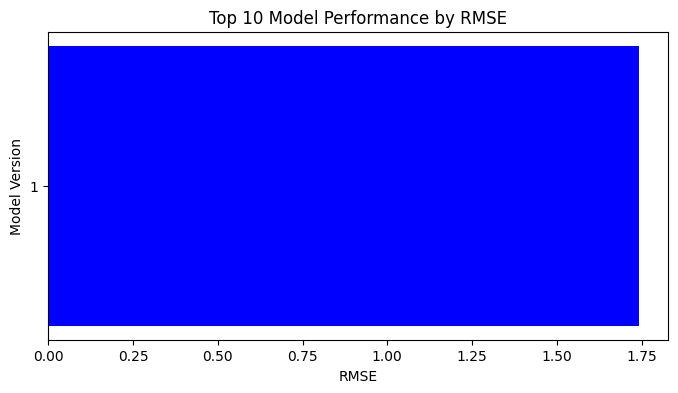

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))  # Adjust figure size
plt.barh(metrics_df["Model Version"].astype(str), metrics_df["RMSE"], color='blue')  # Horizontal bar chart
plt.xlabel("RMSE")
plt.ylabel("Model Version")
plt.title("Top 10 Model Performance by RMSE")
plt.gca().invert_yaxis()  # Invert y-axis to show best model at the top
plt.show()


In [36]:
from mlflow.tracking import MlflowClient

client = MlflowClient()

# List all registered models
registered_models = client.search_registered_models()
for model in registered_models:
    print(f"Model Name: {model.name}")


Model Name: azureml_marketing_budget_optimisation_0_output_mlflow_log_model_786752989
Model Name: azureml_marketing_budget_optimisation_1_output_mlflow_log_model_326650724
Model Name: azureml_marketing_budget_optimisation_2_output_mlflow_log_model_326650724
Model Name: azureml_marketing_budget_optimisation_3_output_mlflow_log_model_427288787
Model Name: azureml_marketing_budget_optimisation_4_output_mlflow_log_model_786752989
Model Name: azureml_marketing_budget_optimisation_5_output_mlflow_log_model_326650724
Model Name: azureml_marketing_budget_optimisation_6_output_mlflow_log_model_427288787
Model Name: azureml_marketing_budget_optimisation_7_output_mlflow_log_model_786752989
Model Name: azureml_marketing_budget_optimisation_8_output_mlflow_log_model_326650724
Model Name: azureml_marketing_budget_optimisation_9_output_mlflow_log_model_427288787
Model Name: azureml_marketing_budget_optimisation_10_output_mlflow_log_model_786752989
Model Name: azureml_marketing_budget_optimisation_11_